# O que é Datomic?
* Um banco de dados de propósito geral;
* Imutável;
* ACID;
* Leituras escaláveis;
* Temporal;
* Pronto para a nuvem;
* **Muito Legal**.

O Datomic pode ser utizado de 3 formas:
* Datomic Pro;
* Datomic Cloud;
* Datomic Local.

**Todas gratuitas!** 

Você pode encontrar as instruções de uso na [documentação](https://docs.datomic.com/setup/setup.html).

Nessa aula nós iremos utilizar o **datomic pro** versão 1.0.7394.

[Documentação](https://docs.datomic.com/reference/filters.html)

# Um pouco sobre arquitetura

**Datomic** é um banco de dados distribuido, isso significa que diferentes ações são realizadas por diferentes componentes!

### Transactor
<img width="33%" src=attachment:2032bab3-66d6-484d-9ba4-b10f21871719.png>

Como o nome diz, um `transactor` é responsável por: executar transações; manter índices; e escrever dados no armazenamento.
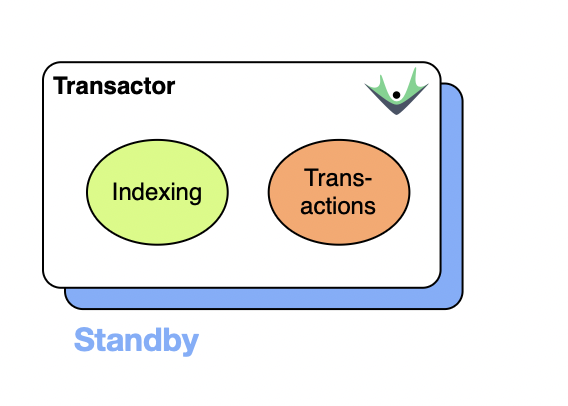

### Peer

<img width="50%" src=attachment:60d13d36-4794-49de-8cb3-e14c3aeac0e8.png>

`Peer`s são grandes clientes, eles incorporam uma biblioteca da **JVM**[1] que submete transações para os `transactors`; executam consultas; e fazem cache dos resultados;

##### [1] Lembre-se que Clojure roda na JVM.
##### Fun Fact: `peer` significa *colega*
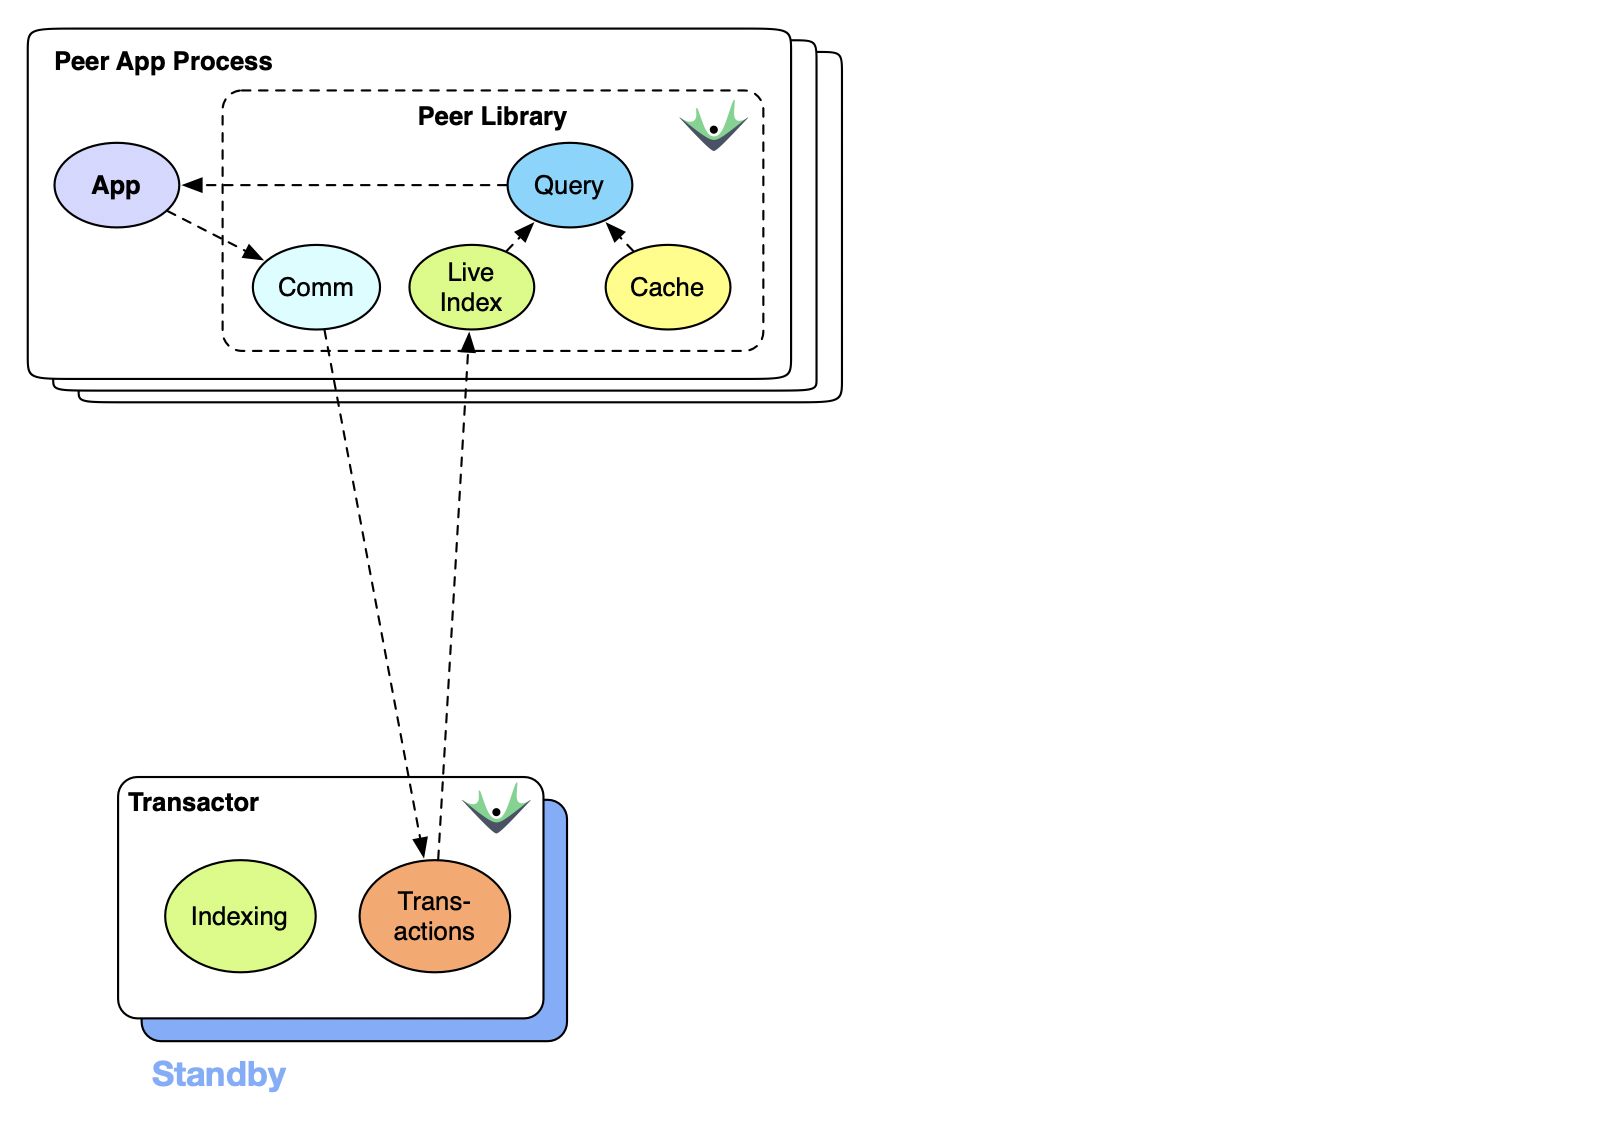

### Representação geral da arquitetura:

<img width="50%" src=attachment:d730f675-a1aa-402a-b729-27119303d0ee.png>
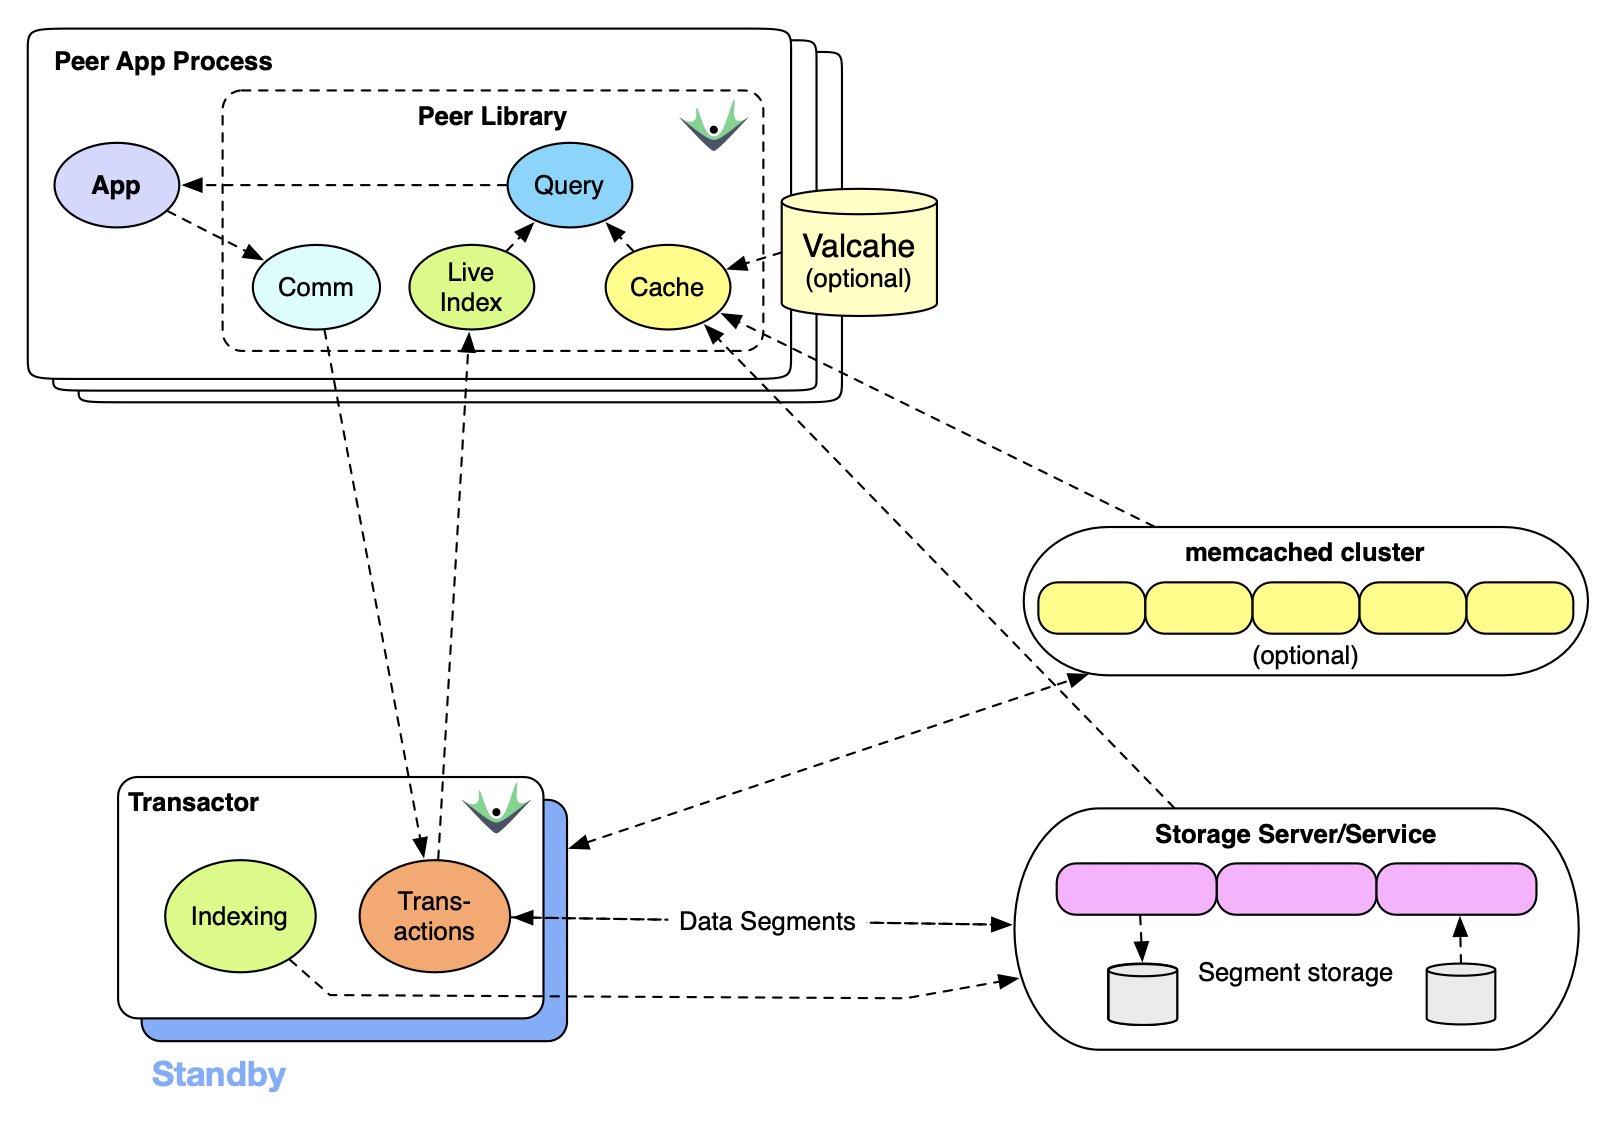

# Modelo de informação

Parte da peculiaridade do Datomic se encontra em seu modelo de informação, em qualquer instante no tempo o estado do banco de dados é representado por um conjunto `[entidade, atributo, valor, transação, op?]`, quíntuplas (`EAVTOp`)[2], conhecidos como `datoms`.

##### [2] Geralmente só nos referimos a quádruplas `EAVT`.

Entidades são deduzidass através de um `e` comum:

<img width="50%" src=attachment:22d1ebca-425b-4316-94bb-b9a034cddb9d.png>

[Documentação](https://docs.datomic.com/datomic-overview.html?search=Datom#information-model)
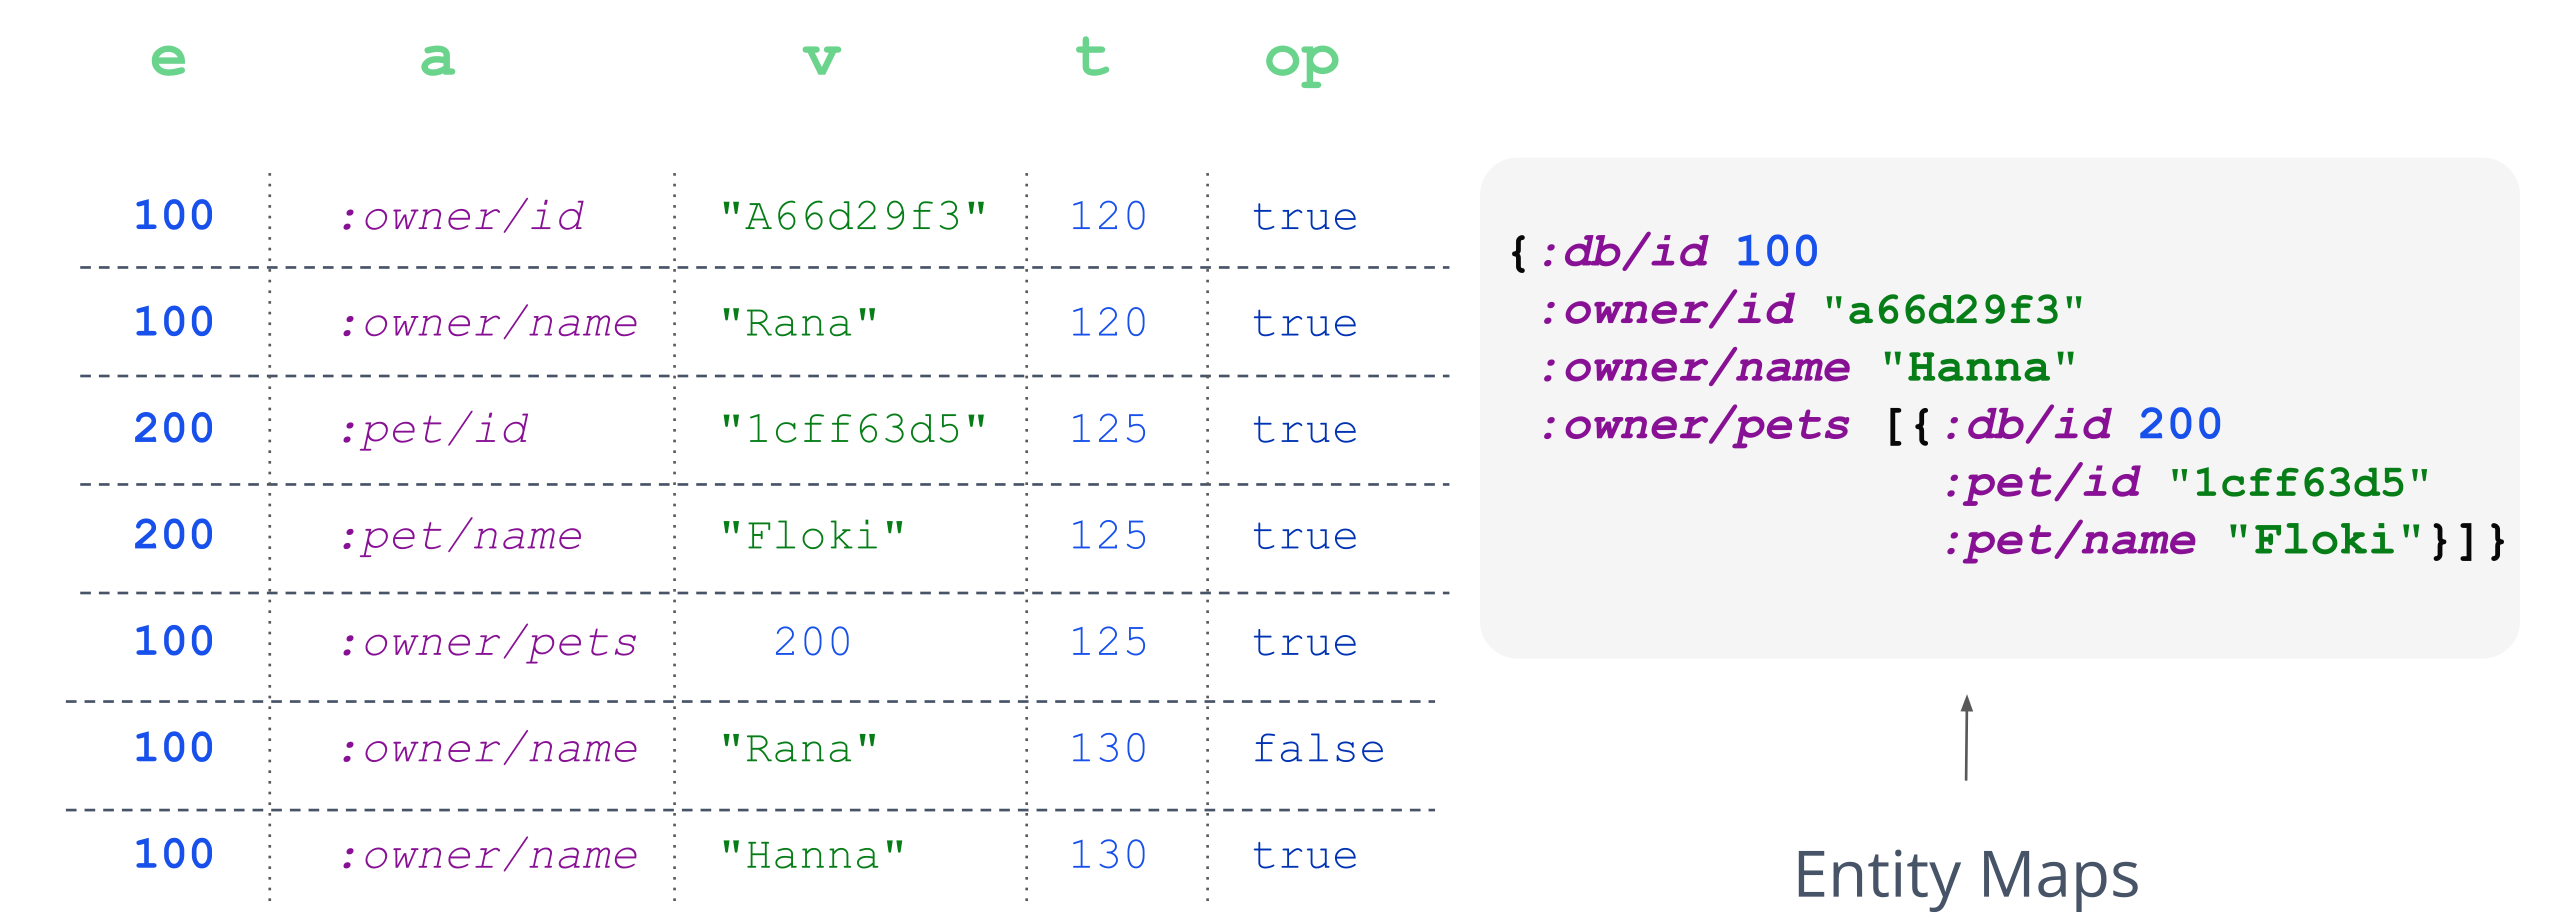

### Tal como LISPs tudo é **dado**, incluindo os schemas:

<img width="50%" src=attachment:d8012f2f-40b3-41bf-b37f-762c9484afb9.png>
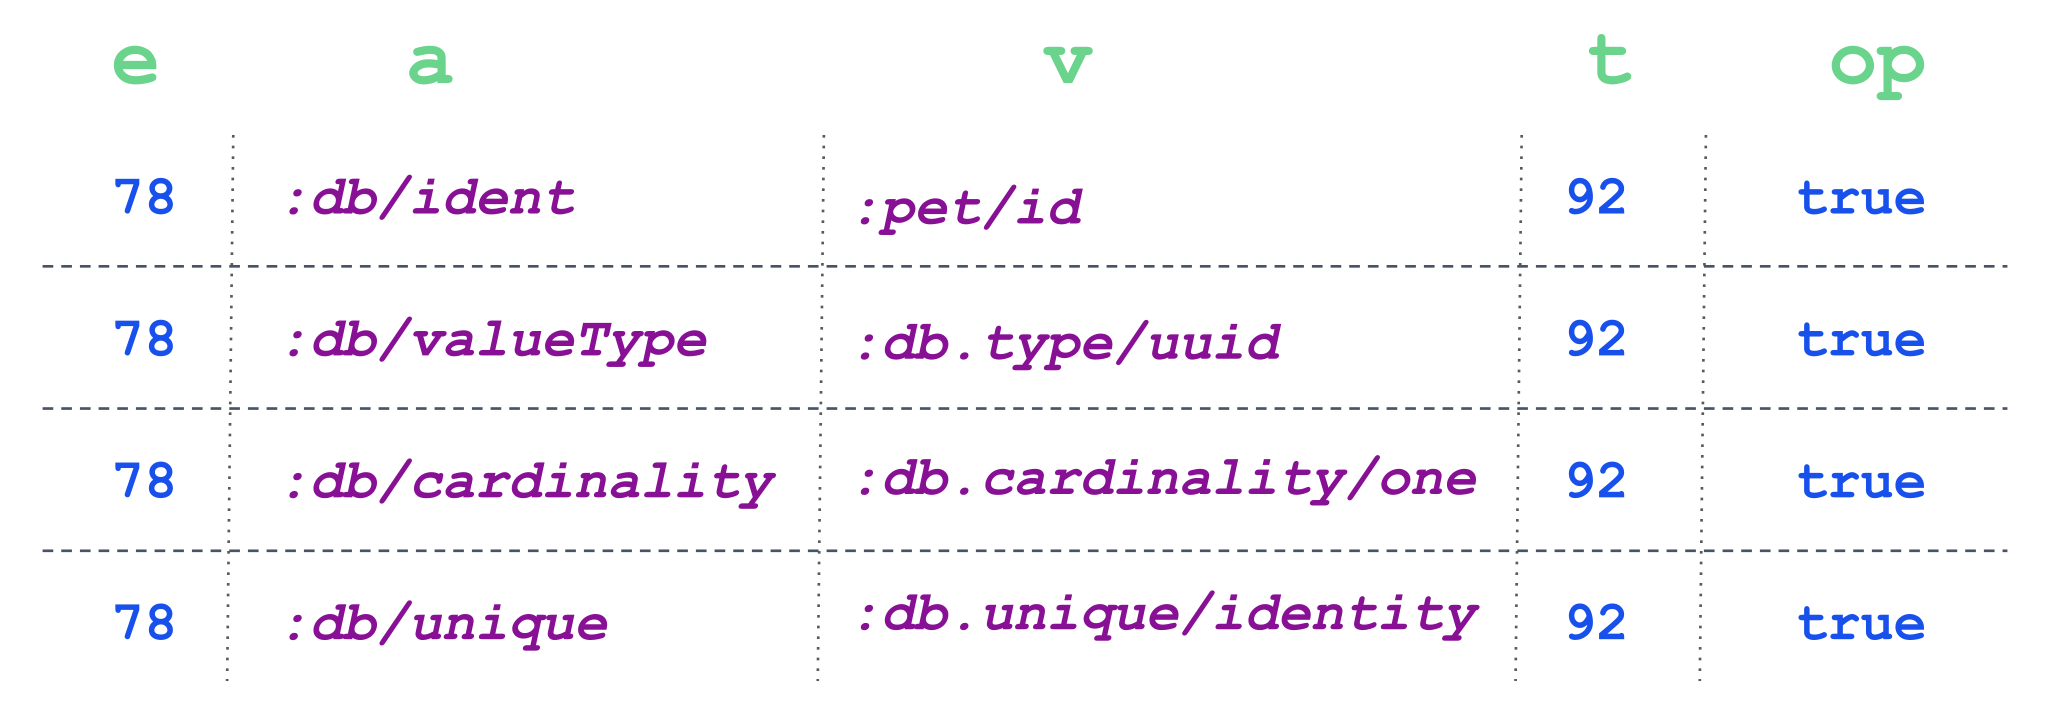

### Questão

Considerando que os `schemas` são dados, como você imagina que eles são adicionados ao armazenameto?

Um `schema` é definido como uma lista de mapas:

In [ ]:
(def schema [{:db/ident       :owner/id
              :db/valueType   :db.type/uuid
              :db/cardinality :db.cardinality/one
              :db/unique      :db.unique/identity
              :db/doc         "Identificador único"}
             {:db/ident       :owner/name
              :db/valueType   :db.type/string
              :db/cardinality :db.cardinality/one}
             {:db/ident       :owner/pets
              :db/valueType   :db.type/ref
              :db/cardinality :db.cardinality/many}])

Perceba que acima só associamos o símbolo `schema` a um valor que define um `schema`.

É apenas código **Clojure**, nada foi de fato feito no banco de dados.

[Documentação](https://docs.datomic.com/schema/schema-reference.html)

# Modelo Temporal
Datomic é um banco de dados temporal, mas o que isso significa?

Isso significa que o Datomic modela o tempo de forma **explicita** onde toda transação é identificada por um **marcador de tempo** (timestamp).

Mais especificamente um **marcador de tempo lógico estritamente monotônico** `t`, tal como um "tempo de relógio" `txInstant`.

Em resumo toda transação também armazena um dado indicando *quando* ela ocorreu, nesse caso o `T` de `EAVT`!

Além disso, `op?` indica se determinado dado está "adicionado" (`assert`) ou foi "recolhido" (`retracted`) em um determinado estado do do banco de dados.

<p>
    <img width="33%" src=attachment:36935ad4-a00d-43e3-b507-904892b3fb78.png>
    <img width="33%" src=attachment:ad980d85-8662-4d59-9598-7cfe2e63761f.png>
</p>

Tudo que não está com `op` igual a `false` está disponível em nosso processo, ou seja, será retornado por padrão em consultas. 

[Documentação](https://docs.datomic.com/reference/filters.html)
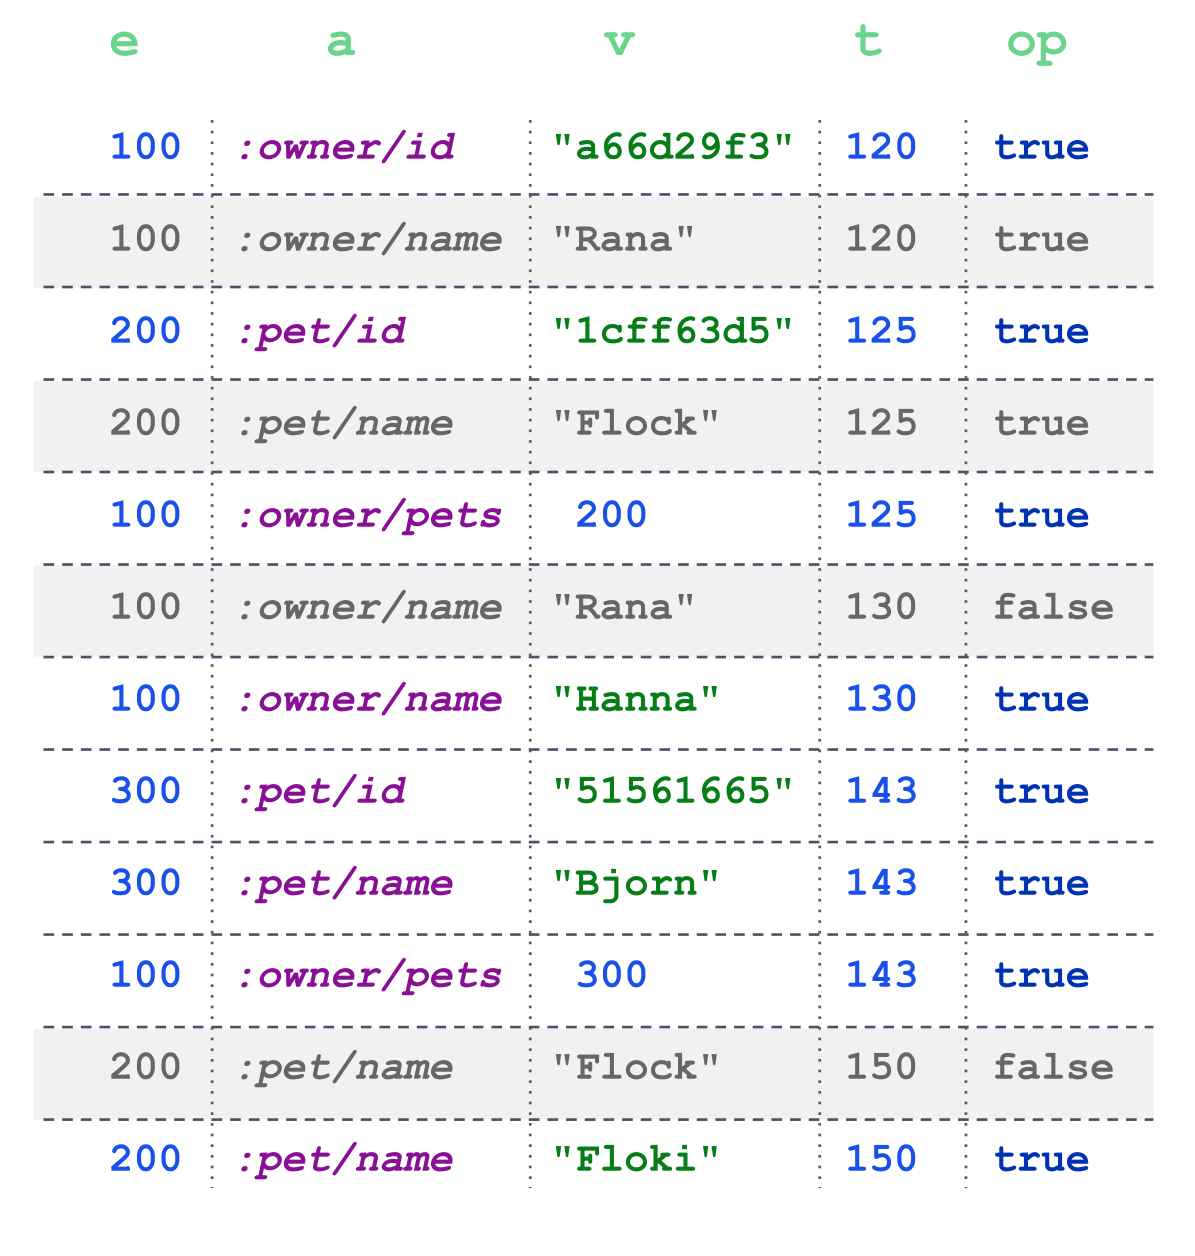
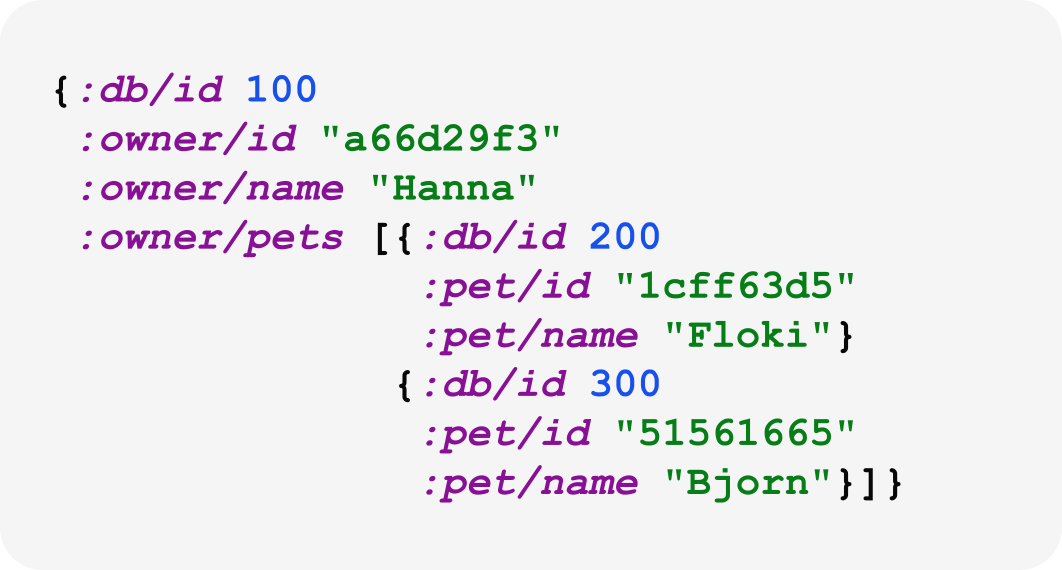

### Algumas funções para filtrar `tempo`

* `as-of`: Retorna o estado do banco de dados até um determinado `t`, `data` ou `id de transação`;
<p>
    <img width="33%" src=attachment:355d2baa-4c77-4371-82a2-cf3bfb790eb1.png>
    <img width="33%" src=attachment:e2eb0172-e70e-43d6-8185-9953ff403668.png>
</p> 

[Documentação](https://docs.datomic.com/reference/filters.html#as-of)

### Questão:
No exemplo acima, `as-of` foi executado com que dado?

* `since`: Retorna o estado do banco de dados desde um determinado `t`, `data` ou `id de transação` de forma **exclusiva**;

<p>
    <img width="33%" src=attachment:1c66bbc9-2f78-49f8-8f1c-9ddfd7993c2e.png>
    <img width="33%" src=attachment:57c685ee-4297-45ca-b3d6-b6b9cd669222.png>
</p>

[Documentação](https://docs.datomic.com/reference/filters.html#since)
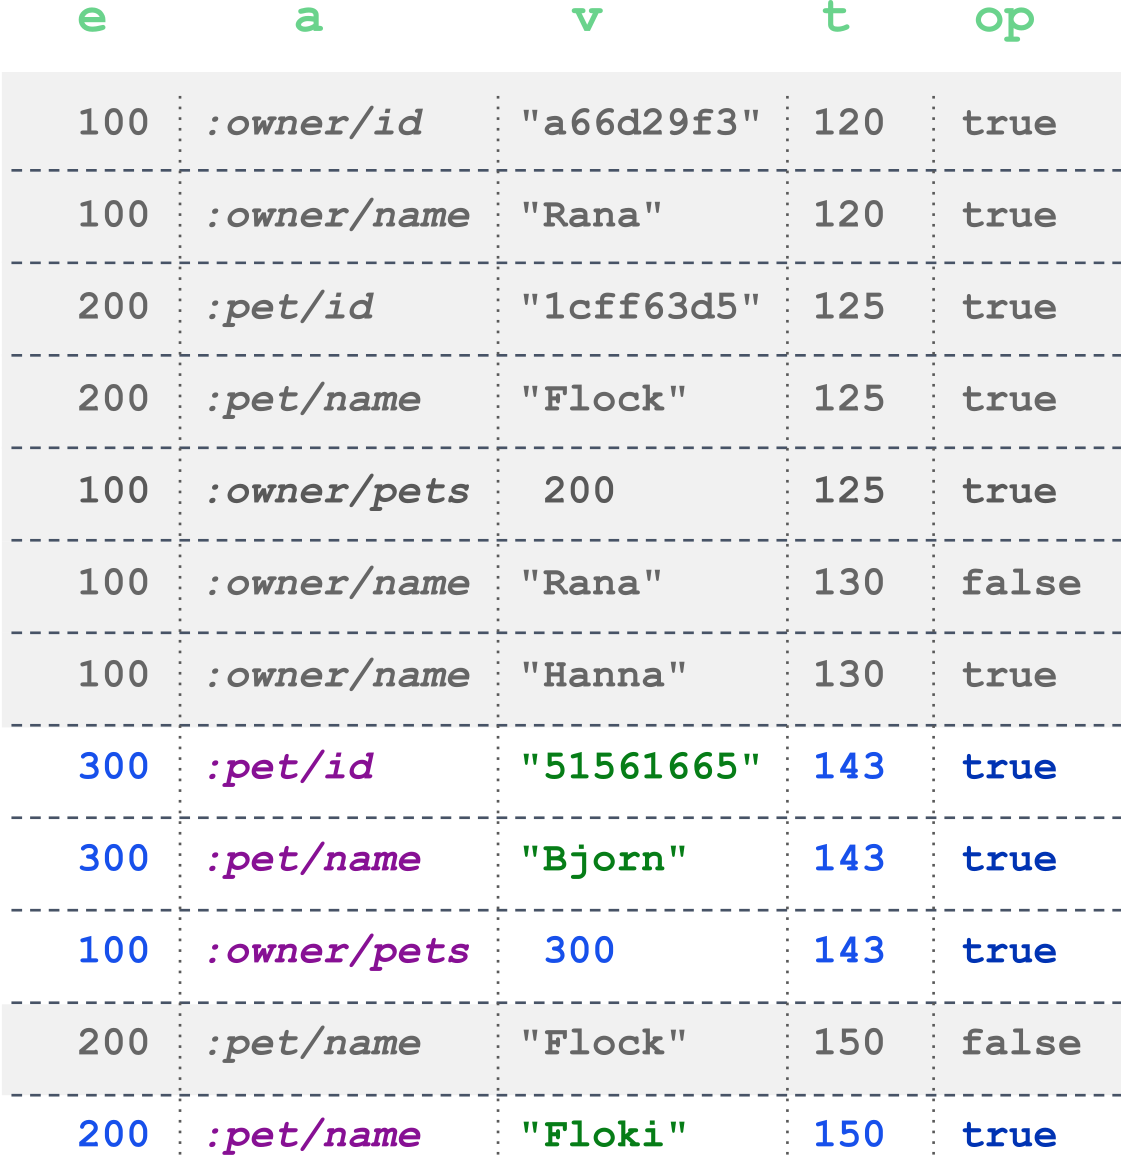
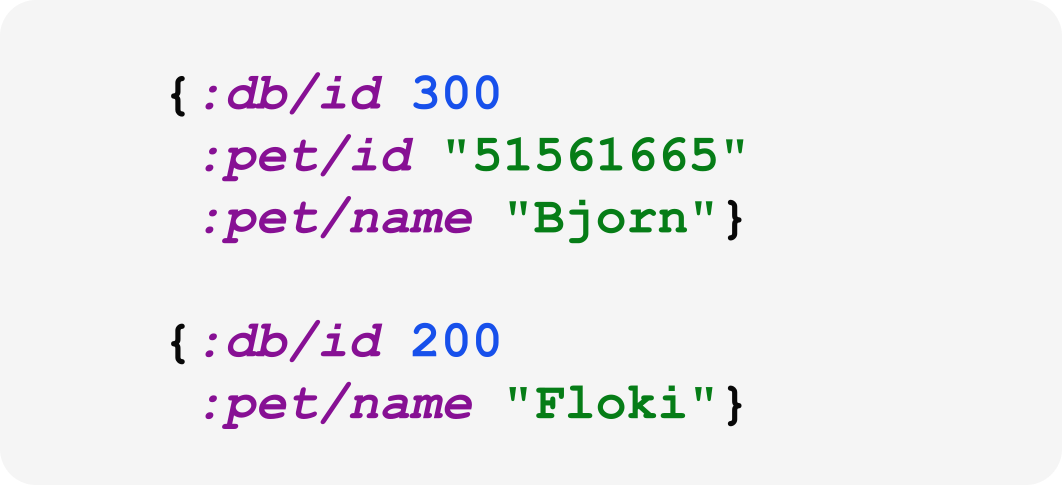

### Questão:
No exemplo acima, `since` foi executado com que dado?

* `history`: Retorna tudo o que já ocorreu no banco de dados;

<img width="33%" src=attachment:2616ad92-d7c6-4f5b-86ba-7dd19345c6bc.png>

[Documentação](https://docs.datomic.com/reference/filters.html#history)
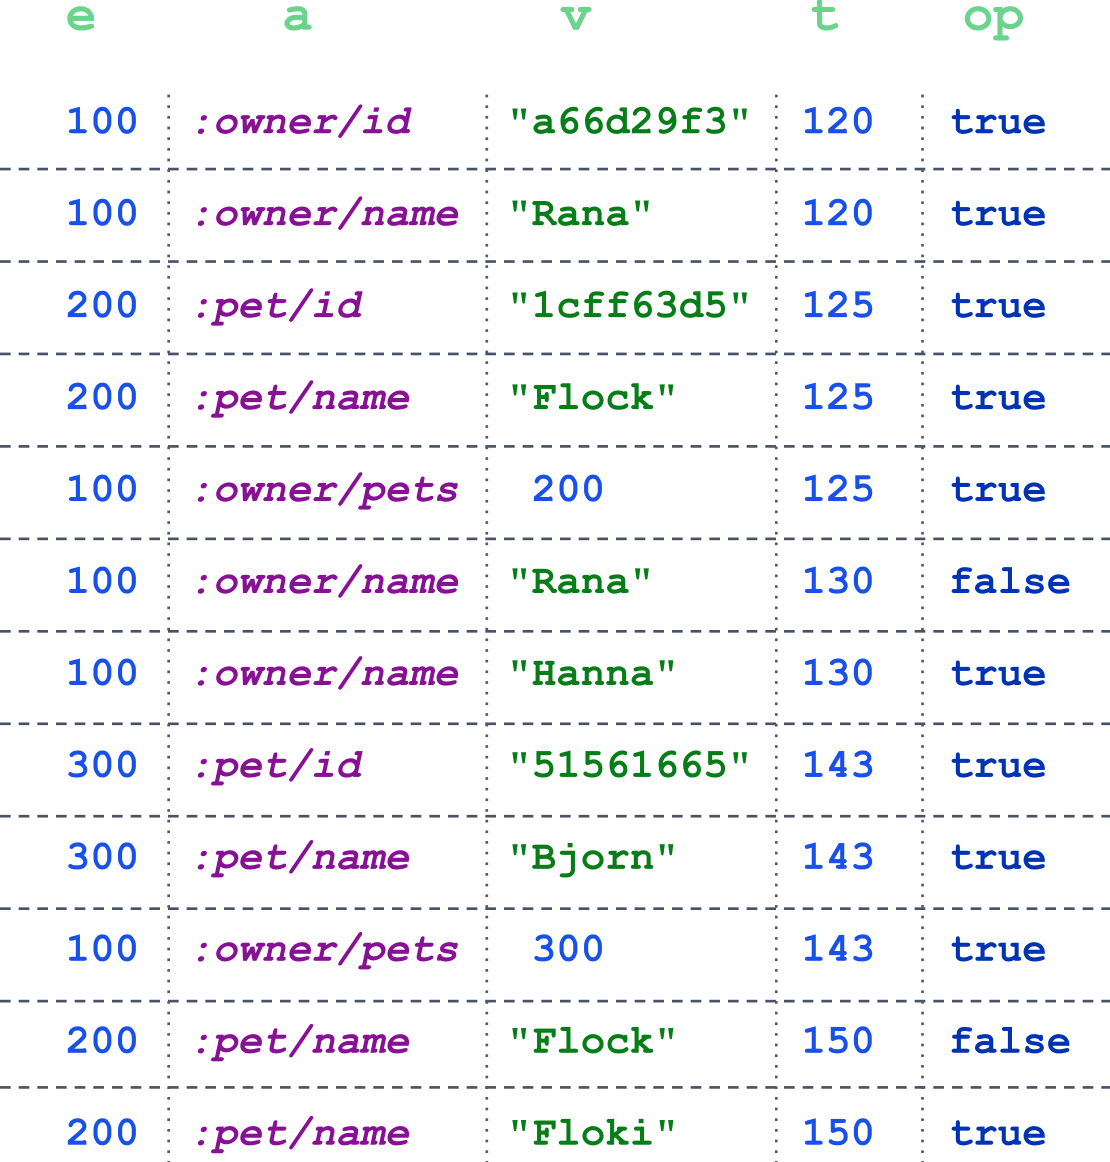

* `with`: Simula uma transação.

<p>
    <img width="33%" src=attachment:7b6b3718-2c6a-4577-a86b-d3c2d01a4e53.png>
    <img width="33%" src=attachment:072a6b58-4add-4e3d-8e6f-434b03eab8f0.png>
</p> 

[Documentação](https://docs.datomic.com/transactions/model.html#with-and-transact)
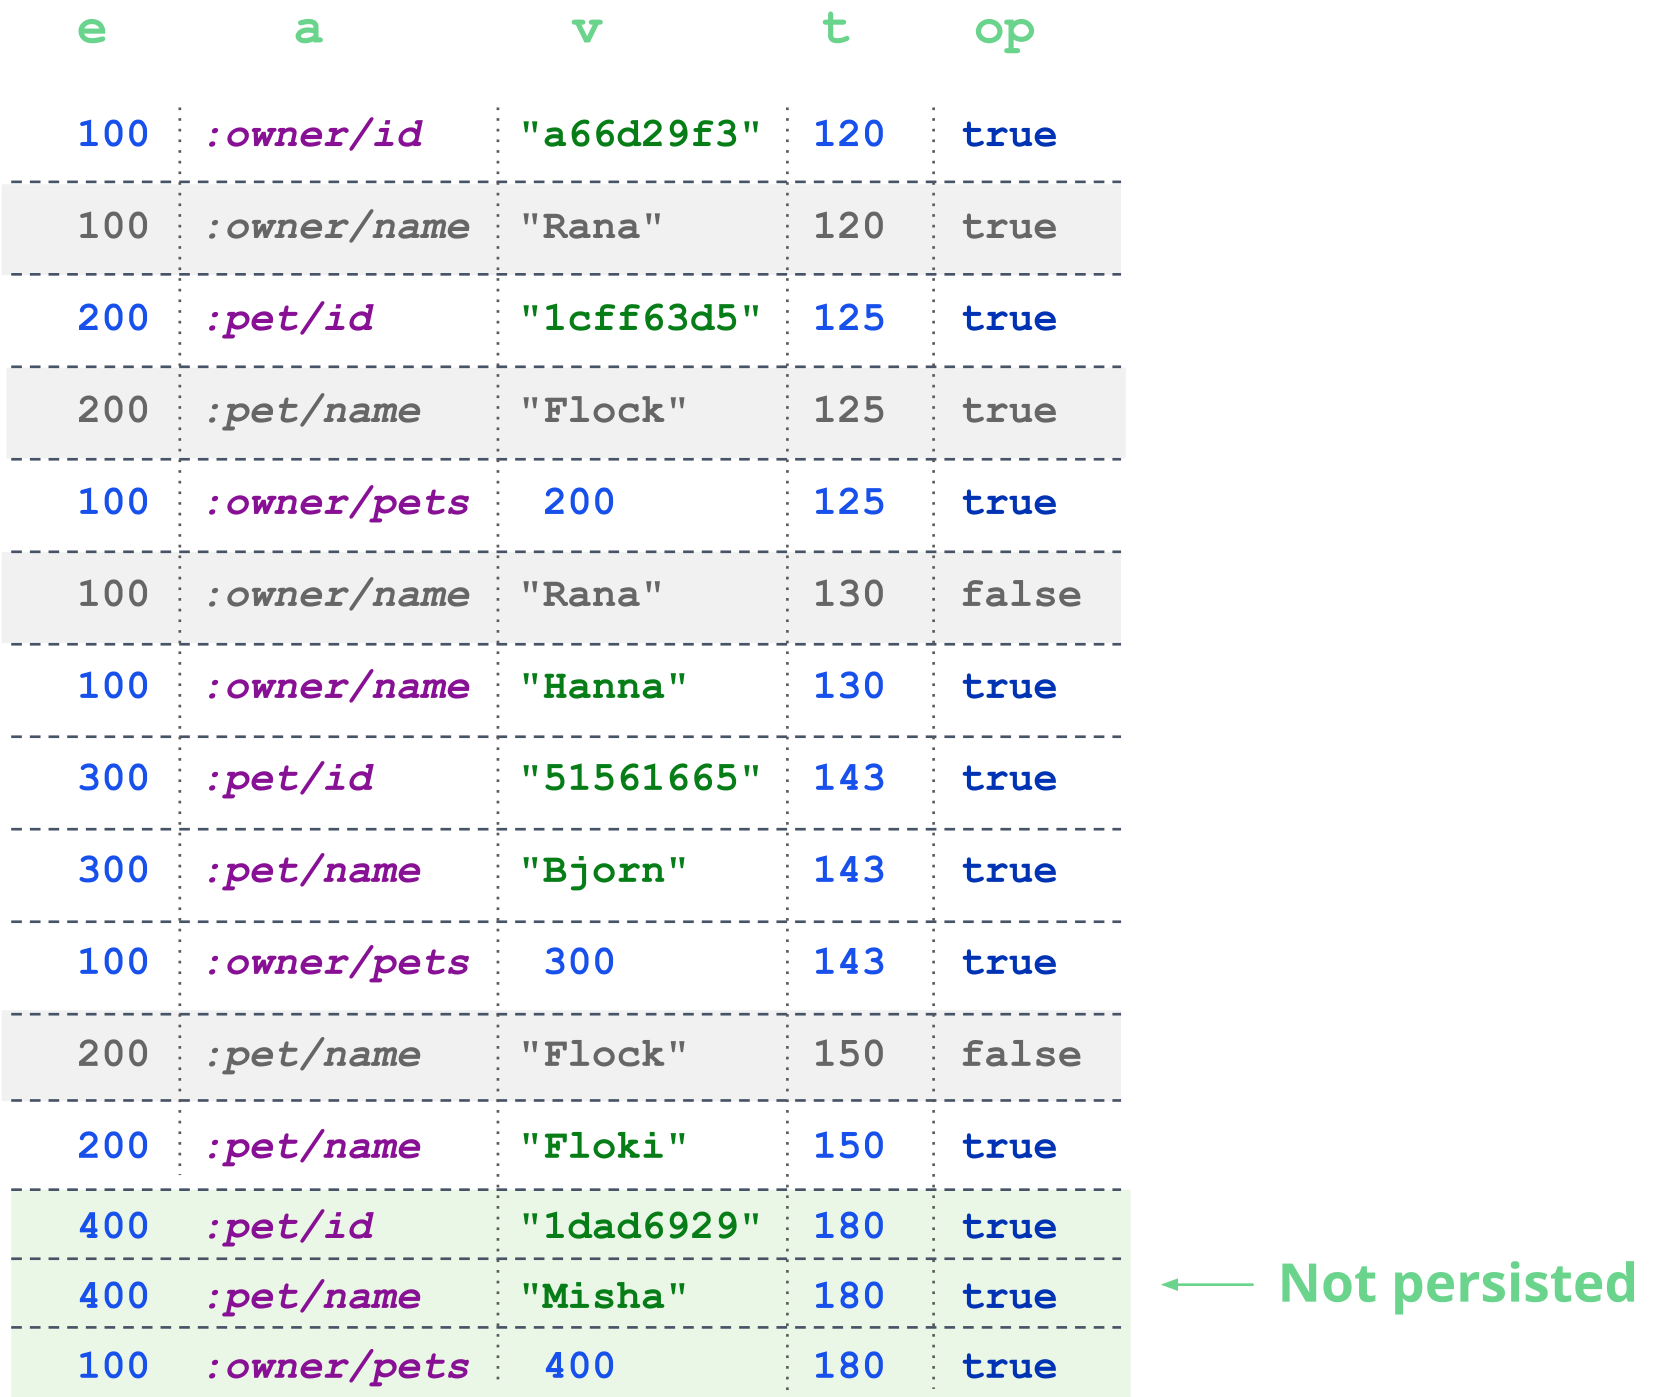
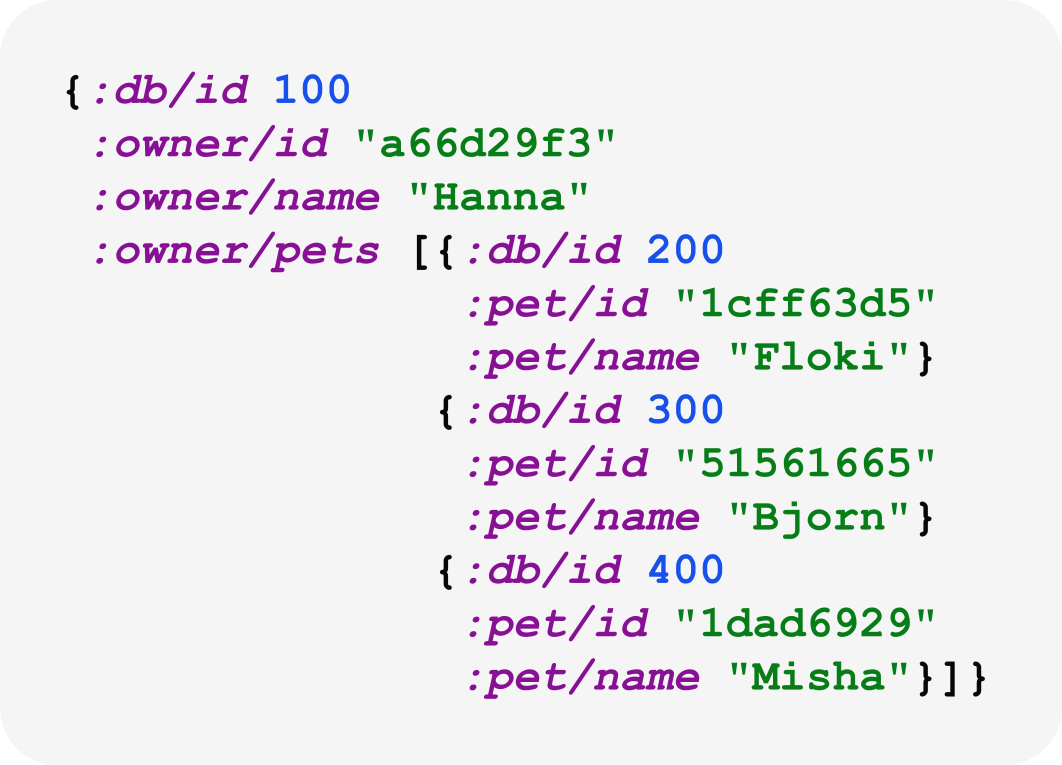

# Primeiros passos

No binder, abra uma nova aba e selecione o terminal.

No terminal digite:

```bash
cd
cd datomic/datomic-pro-1.0.7394/
bin/transactor config/samples/dev-transactor-template.properties 
```
E espere o sistema devolver:
```
System started
```

Você acabou de lançar um `transactor`!

Agora rode o bloco a seguir, ele será responsável por importar a `peer api`  do `datomic` junto com o `pretty printer` (`clojure.pprint`):

In [ ]:
(require '[clojupyter.misc.helper :as helper]
         '[clojure.pprint :as pp])

(helper/add-dependencies '[com.datomic/peer "1.0.7394"])

(require '[datomic.api :as d])

Agora vocês já possuem o que é necessário para realizar os exercícios desta aula.

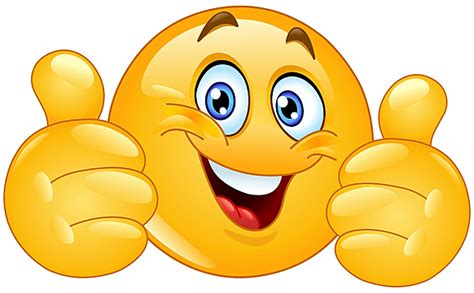

# Vamos colocar um pouco em prática:

##### Instruções:
* Comentários com **TODO** significam que algo precisa ser completado;
* Chaves ou símbolos `change-me` devem ser alterados para algo que faça sentido.

Qualquer dúvida é só perguntar!

##### Lembre-se de estar com o transactor rodando!

Primeiramente vamos definir uma rota para nosso banco de dados:

In [ ]:
(def db-uri "datomic:dev://localhost:4334/petshop")

Agora vamos criar o banco de dados:

In [ ]:
(d/create-database db-uri)

Se em algum momento você quiser destruir seu banco de dados, basta rodar: 
```clojure
(d/delete-database db-uri)
```

Agora vamos nos conectar ao banco:

In [ ]:
(def conn (d/connect db-uri))

Perceba que a função que connecta ao banco `d/connect` também retorna a conexão, isso porque tudo é **dado**!

veja:

In [ ]:
conn

In [ ]:
(d/db conn) ;-> Extrai o banco da conexão

### Exercícios
* Complete o [valueType](https://docs.datomic.com/schema/schema-reference.html#db-valuetype) de `:owner/pets`, ele deveria ser uma referência a outra entidade;
  INFO: No datomic a noção de referência a uma entidade específica não existe, quem decide isso é a aplicação;
* Defina a [cardinalidade](https://docs.datomic.com/schema/schema-reference.html#db-cardinality) de `:owner/pets`;
* Faça o `:pet/id` um [identificador único](https://docs.datomic.com/schema/schema-reference.html#db-unique-identity);
* Defina mais [enumerações](https://docs.datomic.com/schema/schema-modeling.html#enums) para `:pet/type`: `:pet.type/dog` e `:pet.type/other`.

In [ ]:
(def schema [{:db/ident       :owner/id
              :db/valueType   :db.type/uuid
              :db/cardinality :db.cardinality/one
              :db/unique      :db.unique/identity}
             {:db/ident       :owner/name
              :db/valueType   :db.type/string
              :db/cardinality :db.cardinality/one}
             {:db/ident       :owner/email
              :db/valueType   :db.type/string
              :db/cardinality :db.cardinality/one}
             {:db/ident       :owner/pets
              :db/valueType   :change-me                 ; TODO 1
              :db/change-me   :db.cardinality/change-me} ; TODO 2
             {:db/ident       :pet/id
              :db/valueType   :db.type/uuid
              :db/cardinality :db.cardinality/one
              :db/unique      :change-me}                ; TODO 2
             {:db/ident       :pet/name
              :db/valueType   :db.type/string
              :db/cardinality :db.cardinality/one}
             {:db/ident       :pet/type
              :db/valueType   :db.type/ref
              :db/cardinality :db.cardinality/one}
             {:db/ident :pet.type/cat}])                 ; TODO 3

Agora vamos adicionar o `schema` em nosso banco:

Sim, é somente uma transação!

In [ ]:
(-> @(d/transact conn schema) ; Transação
    pp/pprint)                ; Pretty Printer

Perceba o que uma transação retorna:
* `db-before`: O estado do banco de dados antes da transação;
* `db-after`: O estado do banco de dados após a transação;
* `tx-data`: Os dados transacionados. Perceba que o primeiro dado é a transação em si:
  * A `entidade` é representada pelo primeiro valor;
  * O `id` do `atributo` o segundo valor;
  * O `valor` do `atributo` o terceiro valor, sendo esse o "tempo de relógio";
  * A `transação` nesse caso é a própria `entidade`;
  * O `op?`, nesse caso sabemos que a transação foi de adição, logo, `true`.
* `tempids`: Um mapa que especifica entidades em que um autor da transação não sabe ou não se importa em fornecer um ID de entidade.

Vamos checar se está tudo certo utilizando uma consulta:

In [ ]:
(d/q '[:find (pull ?e [*])
       :in $ ?attribute
       :where [?e :db/ident ?attribute]] (d/db conn) :owner/pets)

Perfeito! Vamos começar a adicionar dados ao nosso banco.

Vamos começar definindo o `id` de um dono:

In [ ]:
(def owner-id (d/squuid)) 

Utilizamos `squuid` ao invés de `uuid`, o motivo é que `squuid` comparam unicidade mais rápido que `uuid v4`.

[Documentação](https://docs.datomic.com/schema/identity.html#squuids)

Vamos agora adicionar um dono com um pet ao nosso banco:
* Dê um `id` para o pet. Você pode criar um como associar um com um símbolo para `owner-id` ou simplesmente rodar a função diretamente;
* Mude o tipo do pet. Lembre-se que nós criamos 3 tipos para os pets: `:pet.type/cat`, `:pet.type/dog` e `pet.type/other`.

In [ ]:
(-> @(d/transact conn [{:owner/id   owner-id
                        :owner/name "Rana"
                        :owner/pets [{:db/id    "F"                       
                                      :pet/id   change-me       ; TODO 1
                                      :pet/name "Floki"
                                      :pet/type :change-me}]}]) ; TODO 2
    pp/pprint)

O `"F"` na terceira linha em `:db/id` é um `id` temporário ([tempids](https://docs.datomic.com/transactions/transaction-data-reference.html#tempids)).

Como você deve ter percebido nós realizamos a transação de entidades nestadas! Além disso, perceba que não adicionamos um `:owner/email`, isso porque não existe verificação de dados obrigatórios.

Essa vetificação pode ser feita utilizando `:db.entity/attrs`

[Documentação](https://docs.datomic.com/schema/schema-reference.html#required-attributes)

Vamos adicionar mais um gato para `:owner/pets`.

Primeiramente definimos um `id`:

In [ ]:
(def bjorn-id (d/squuid))

Você pode guardar o retorno de uma transação em um váriavel para [monitorar]( https://docs.datomic.com/transactions/transaction-processing.html#monitoring-transactions) no futuro.

* Altere o `:owner/id`;
* Altere o `:pet/id`;
* Altere o `:pet/type`.

In [ ]:
(def tx-return @(d/transact conn [{:owner/id   :change-me                   ; TODO 1
                                   :owner/pets [{:db/id    "B"
                                                 :pet/id   :change-me       ; TODO 2
                                                 :pet/name "Bjorn"
                                                 :pet/type :change-me}]}])) ; TODO 3

Visto que salvamos o retorno da transação em uma váriabel, podemos agora analisar o log gerado, por exemplo, com m `pprint`:

In [ ]:
(pp/pprint tx-return)

Ao invés de transacionar `mapas` podemos também transacionar `vetores` com instruções [específicas](https://docs.datomic.com/transactions/transaction-processing.html#monitoring-transactions): `:db/add`, `:db/retract` ou qualquer uma definida por você!

##### **INFO**: Quando atualizando o atributo de cardinalidade um de uma entidade existente, duas transações serão [implicitamente](https://docs.datomic.com/client-tutorial/retract.html#implicit-retract) criadas: uma para "recolher" (`retract`) o valor antigo e outra para "adicionar" o novo.

O nome da *Hanna* está errado em nosso banco, vamos criar uma transação para resolver isso!

* Complete a transação. Como podemos **identificar** a Hanna em nosso banco?

In [ ]:
@(d/transact conn [[:db/add [:change-me :change-me] :owner/name "Hanna"]]) ; TODO 1

Por fim, vamos dar uma olhada nas entidades presentes em nosso banco. Não se preocupe com a estrutura da consulta por enquanto.

In [ ]:
(-> (d/q '[:find ?e ?a ?v ?t ?op
           :where (or [?e :owner/id]
                      [?e :pet/id])
           [?e ?a ?v ?t ?op]]
         (d/db conn))
    (as-> q
        (doseq [e q]
            (println "-" e "\n"))))

# Mais sobre o modelo transacional

## ACID
* **Atomico**: Tudo ou nada;
* **Consistente**: Mesma ordem global;
* **Isolado**: Forte serialização sobre gravações;
* **Durável**: Persiste antes de reponder completamente.

### Consistência
Datomic se diz ACID e fala sério!

Sua [documentação ACID](https://docs.datomic.com/transactions/acid.html) faz promessas detalhadas e específicas com relação a modelos de consistência e garantias de durabilidade:

* As transações são “gravadas no armazenamento em uma única gravação atômica”, o que exclui anomalias de leitura intermediária.
* Cada `peer` “vê as transações concluídas a partir de um determinado momento” e observa **todas** as transações, totalmente ordenadas, até esse momento.
* As transações são sempre transferidas para o armazenamento durável antes da confirmação do cliente.

# Duas operações simples

```clojure
[:db/add entidade-id atributo valor]     ; Adiciona
[:db/retract entidade-id atributo valor] ; "Recolhe"
```

Também existe a `:db/excise`, mas ninguém gosta dela!

A [excisão](https://docs.datomic.com/operation/excision.html) só existe para cumprir a LGPD, pois é obrigatório existir uma forma de excluir **permanentemente** dados de um banco.

É uma operação não otimizada para o modelo do datomic é deve ser utilizada somente em cenários **extremamente** específicos!

Podem ser representados como mapas:

<img width="40%" src=attachment:6a6fa862-494d-440c-a7c7-4ac0ef76efa2.png>

[Relatório do JEPSEN](https://jepsen.io/analyses/datomic-pro-1.0.7075)    
[Documentação](https://docs.datomic.com/transactions/transaction-data-reference.html)
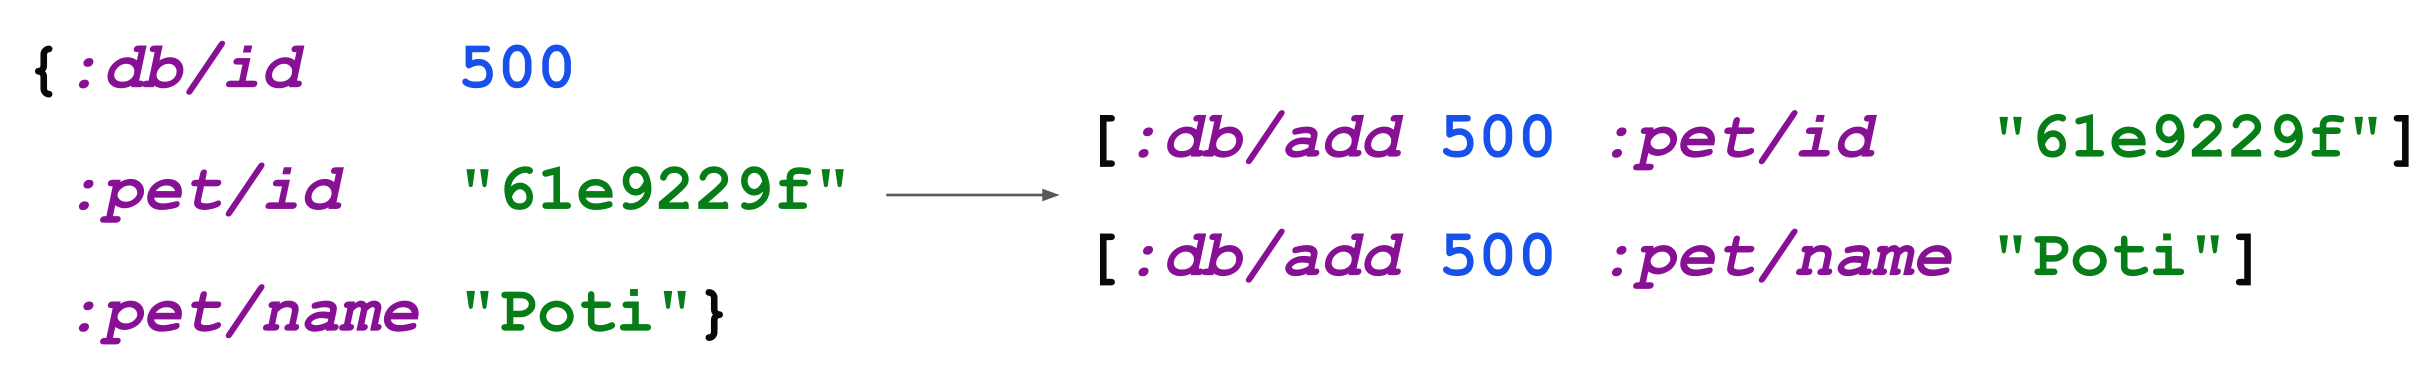

### Identidade
* Id da entidade: `ID` opaco do banco de dados - `long`;
* `:db.unique/identity`: `ID` externo - `string`, `uri`, `uuid` ... o recomendade é utilizar `squuid`s;
* `:db/ident`: Nome programático - `keyword`.

[Documentação](https://docs.datomic.com/schema/identity.html)

### Você pode usar funções!!!

Você pode utilizar tanto as funções embutidas `:db/cas` e `db/retractEntity` quanto funções criados por você mesmo!

[Documentação](https://docs.datomic.com/transactions/transaction-functions.html)

### Transações também são entidades

<img width="40%" src=attachment:9ac25b40-0eba-4cf4-b9f6-1e32abaaec9a.png>

[Documentação](https://docs.datomic.com/transactions/transaction-data-reference.html#reified-txes)
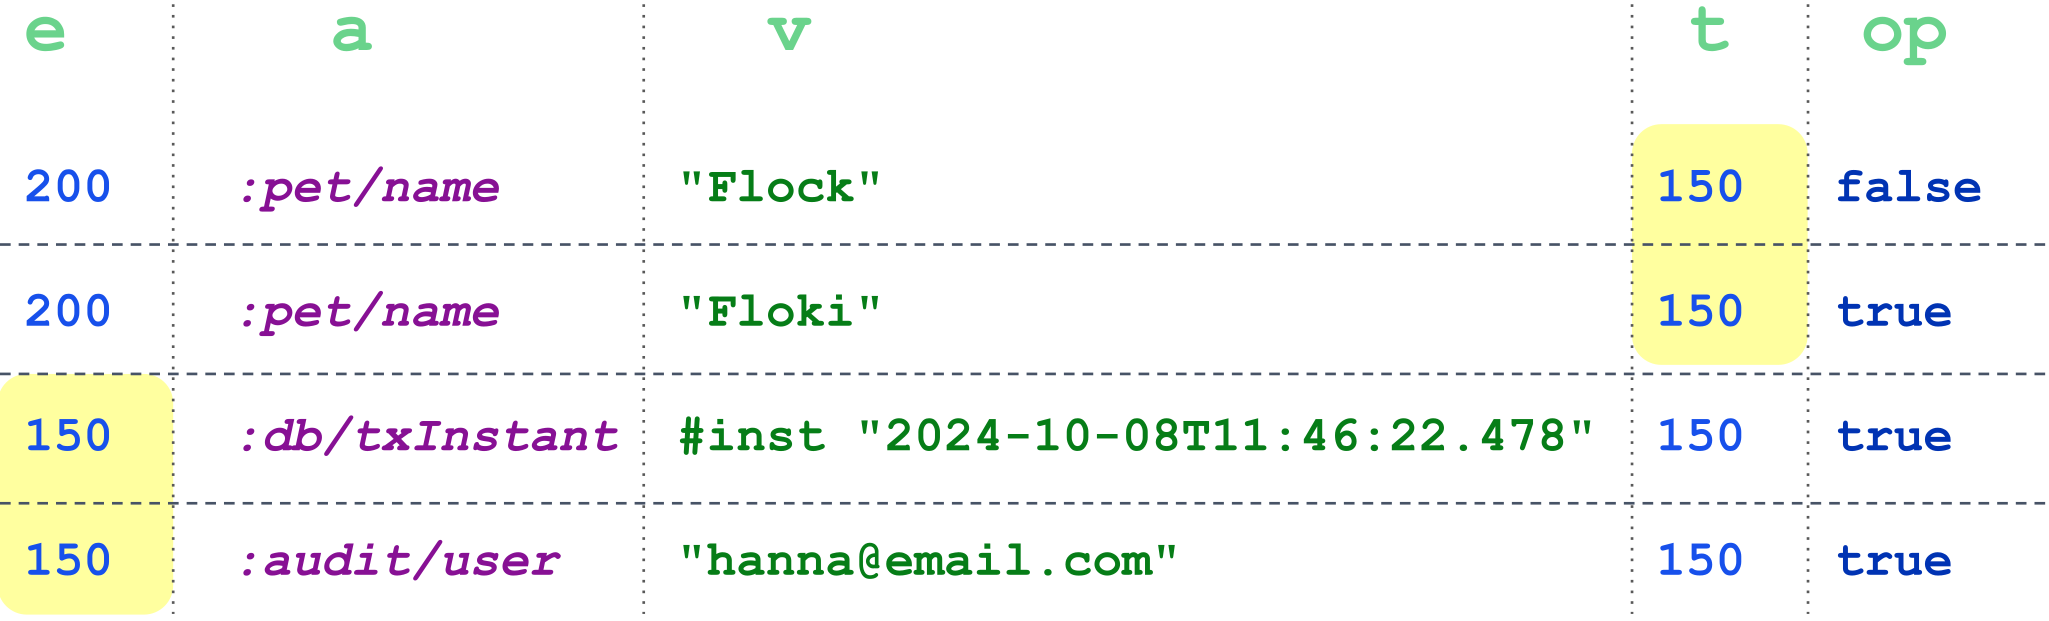

### Índices

Internamente o Datomic anexa (`append`) cada transação para o log: um conjunto de transações ordenado por tempo.

No log o Datomic mantém quatro índices ordenados por diferentes permutações de `entidade`, `atributo`, `valor` e `transação` (`EAVT`).

Essas permutações são utilizadas pelo sistema de consultas do Datomic.

[Documentação](https://docs.datomic.com/indexes/index-model.html)

### **E**AVT

Ordenado por `entidade`, `atributo`, `valor` e `transação`.
* Banco de dados orientados a linha;
* Banco de dados orientadas a documentos (componentes).
  
<img width="40%" src=attachment:d45f2ba5-f82d-4101-b8a5-fefbcef90323.png>

[Documentação](https://docs.datomic.com/indexes/index-model.html#EAVT)
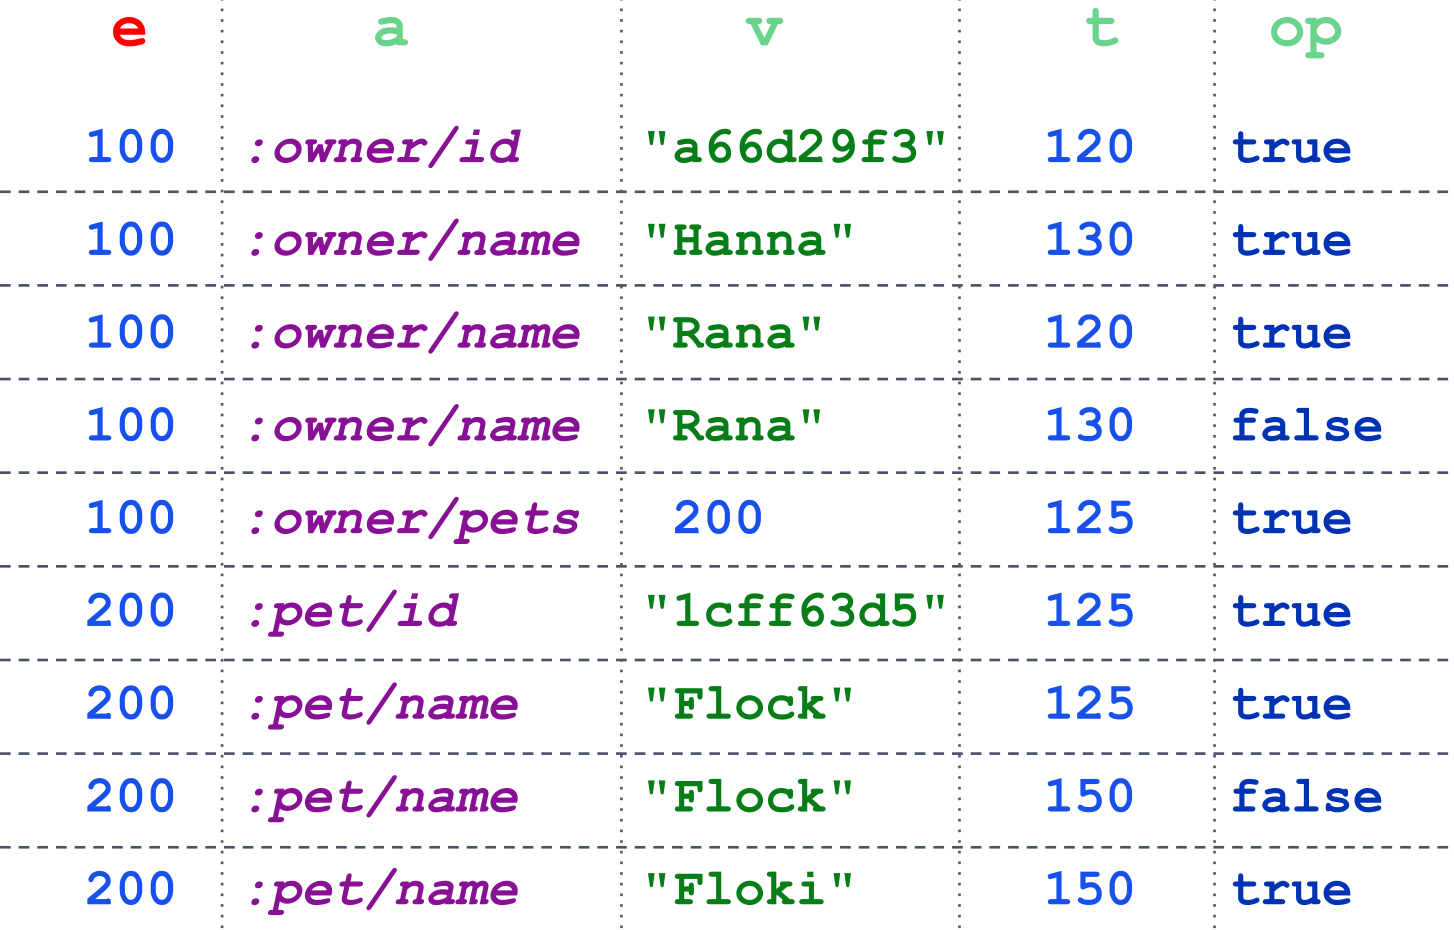

### **A**VET

Ordenado por `atributo`, `valor`, `entidade`  e `transação`.

Somente criados para atributos indexados ou unicos.

* Banco de dados orientados a chave/valor.

<img width="40%" src=attachment:b0ab6b6a-fdf6-4fd7-abb9-f13d660f4b77.png>

[Documentação](https://docs.datomic.com/indexes/index-model.html#avet)
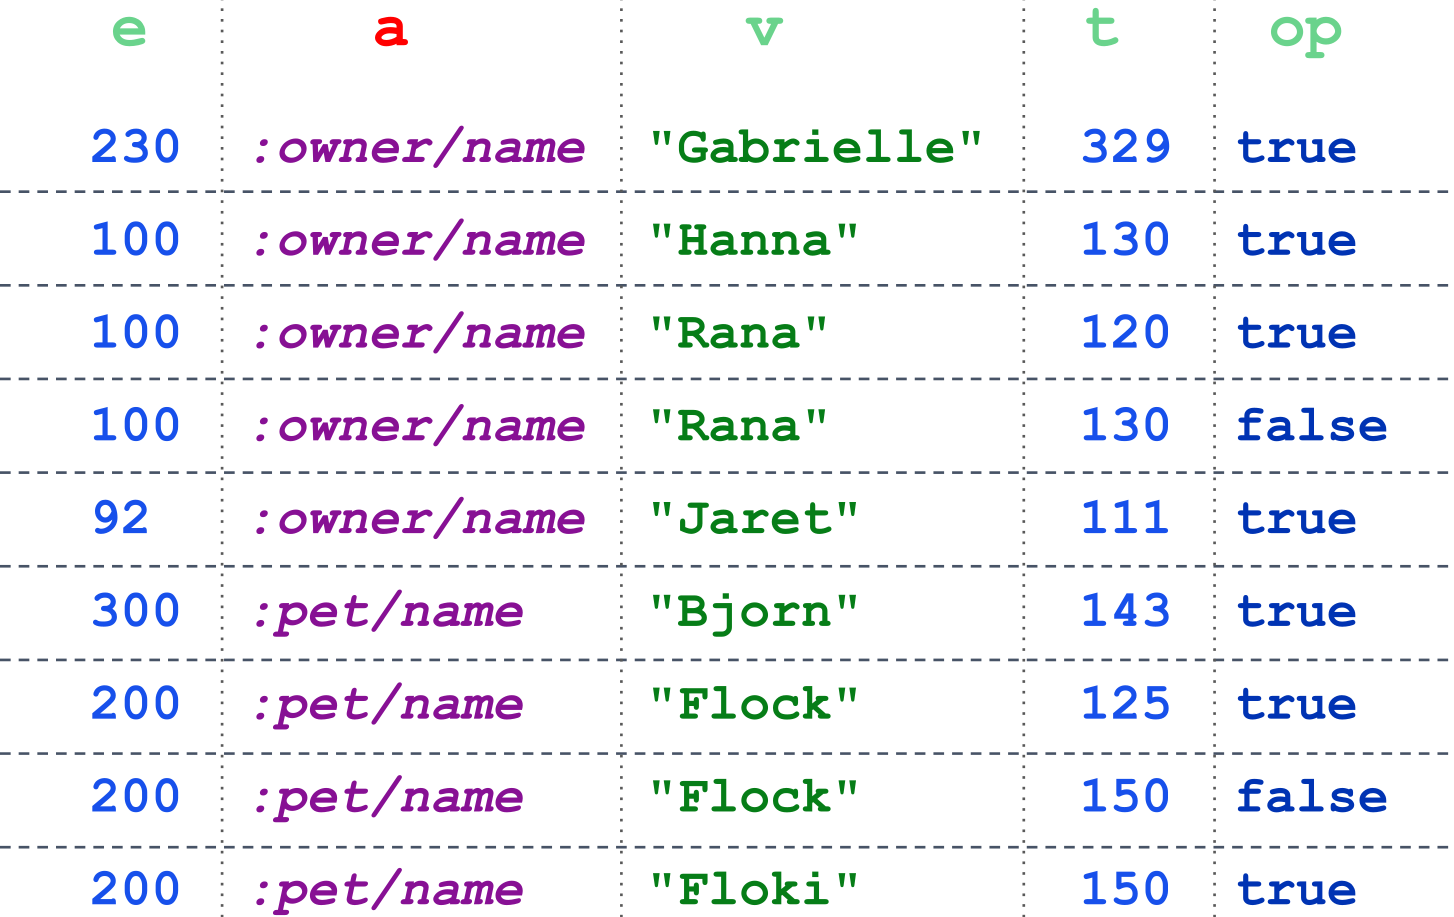

### **V**AET

Ordenado por `valor`, `atributo`, `entidade` e `transação`.

Criado somente para atributos do tipo `:db.type/ref`

* Banco de dados orientado a grafos

<img width="40%" src=attachment:ab94db6c-8482-4e7b-933a-1df11dd21af8.png>

[Documentação](https://docs.datomic.com/indexes/index-model.html#VAET)

### **A**EVT

Ordenado por `atributo`, `entidade`, `valor` e `transação`.

* Banco de dados orientado a coluna

<img width="40%" src=attachment:4ed263c2-0564-42f8-996e-cc3f2f72dbc5.png>

[Documentação](https://docs.datomic.com/indexes/index-model.html#VAET)
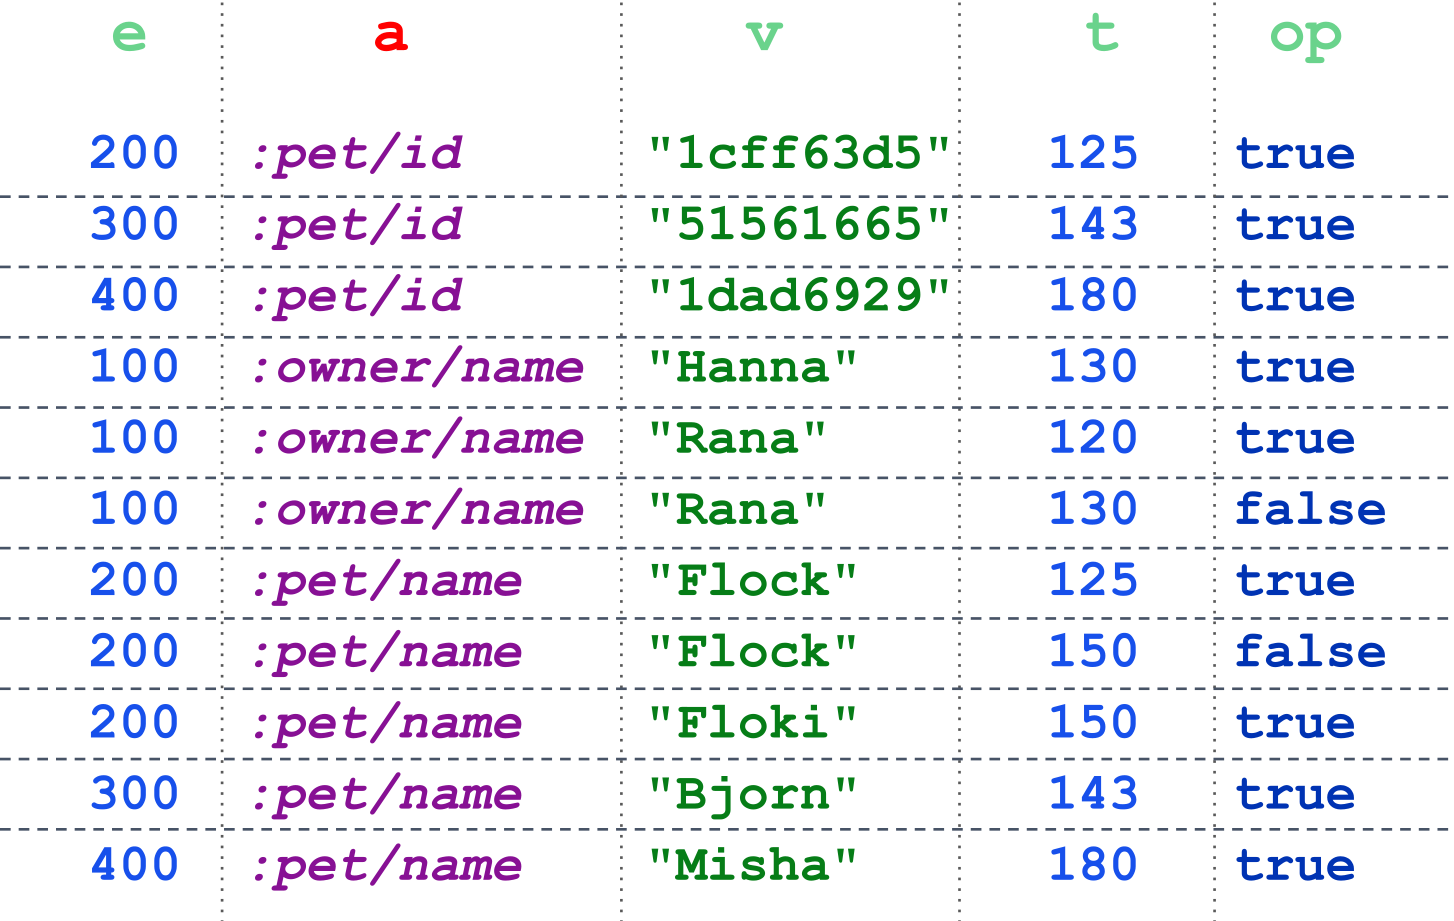

### Exercícios

Hanna adotou um novo gato, Poti! Vamos persistir esse novo gato utilizando o formato de lista.

* Adicione uma [referência](https://docs.datomic.com/schema/identity.html#lookup-refs) a Poti. 

In [ ]:
@(d/transact conn [[:db/add "P" :pet/id (d/squuid)]
                   [:db/add "P" :pet/name "Poti"]
                   [:db/add "P" :pet/type :pet.type/cat]
                   [:db/add [:owner/id owner-id] :owner/pets "change-me"]]) ; TODO 1

`Pull` é outra [api](https://docs.datomic.com/query/query-pull.html) utilizada para consultas:

In [ ]:
(d/pull (d/db conn) [:db/id :owner/name :owner/email {:owner/pets [:pet/name]}] [:owner/id owner-id])

Na consulta acima nós mostramos o id do bancod de dados `:db/id`, o nome da dona `onwer/name`, e percoremos recursivamente as referências aos gatos `:owner/pets` para mostrarmos o nome de cada gato `:pet/name`.

Tudo isso a partir de um `owner/id` de valor `owner-id`.

Adicione um `email` para Hanna. 

Utilize o formato de mapa e o formato de lista!

In [ ]:
@(d/transact conn [...])

Lembra que `schemas` também são `entidades`? Nós podemos consulta-los usando `pull`:

In [ ]:
(d/q '{:find  [(pull ?e [* {:db/valueType          [:db/ident]
                            :db/cardinality        [:db/ident]
                            :db.install/_attribute [:db/ident]}])]
       :in    [$ ?schema]
       :where [[?e :db/ident ?schema]]}
     (d/db conn) 
     :pet/name)  

##### **INFO**:
Você pode adicionar atributos adicionais a uma entidade de transação para capturar outras informações úteis, como a finalidade da transação, a applicação que executou a transação, a proveniência dos dados que ela adicionou ou o usuário que a executou, ou qualquer outra informação que possa ser útil para fins de auditoria.

O Datomic decidirá o `tempid` reservado "*datomic.tx*" para a transação atual.

Você pode usar esse `tempid` para fazer afirmações sobre a transação atual, como faria com qualquer outra entidade.

[Documentação](https://docs.datomic.com/transactions/transaction-data-reference.html#reified-txes)

Adicione um novo atributo  `:audit/email` com [tipo](https://docs.datomic.com/schema/schema-reference.html#db-valuetype) `string`.

Lembre-se de adicionar a [cardinalidade](https://docs.datomic.com/schema/schema-reference.html#db-cardinality)!

In [ ]:
(def audit-schema [{:db/ident       :audit/email 
                    :db/valueType   :db.type/string
                    :db/cardinality :db.cardinality/one
                    #_(...)}])


Lembre-se de realizar uma transação para o `audit-schema`.

In [ ]:
@(d/transact change-me audit-schema) ; TODO 1

Vamos testar nosso novo schema adicionando mais um gato para Hanna, a Fiona!

In [ ]:
(def fiona-id (d/squuid))

@(d/transact conn [{:db/id       "datomic.tx"
                    :audit/email "aldo@email.com"}
                   {:owner/id   owner-id
                    :owner/pets [{:db/id    "F"
                                  :pet/id   fiona-id
                                  :pet/name "Fiona"
                                  :pet/type :pet.type/cat}]}])

Agora uma consulta para ver se está tudo certo:

In [ ]:
(d/q '[:find (pull ?tx [*])
       :in $ ?pet-id
       :where [?_ :pet/id ?pet-id ?tx]]
     (d/db conn) fiona-id)

Houve um erro e a entidade da Fiona não deveria ter sido criada. 

* Adicione o id correto para que a transação ocorra com sucesso!

##### **INFO**: Ao inves de remover datom por datom você pode utilizar a função de transação `:db/retractEntity`

[Documentação](https://docs.datomic.com/transactions/transaction-functions.html#dbfn-retractentity)

In [ ]:
(d/transact conn [[:db/retractEntity [:pet/id change-me]]]) ; TODO 1

Veja que o bloco acima retornou uma `promise`, por conta disso que nós estamos utilizando `@` ([deref](https://clojuredocs.org/clojure.core/deref)) em todas as transações!

[Documentação](https://clojure.org/reference/refs)

Iremos focar em consultas a partir de agora!

Mas se você quiser aprender mais sobre Datomic você pode iniciar lendo sobre mais opções de criação de [schemas](https://docs.datomic.com/schema/schema-reference.html), criação de atributos que são [tuplas](https://docs.datomic.com/schema/schema-reference.html#tuples) e até mesmo a criação de suas próprias [funções de transação](https://docs.datomic.com/transactions/transaction-functions.html).

A documentação do Datomic é bem completa e pode ser encontrada em: https://docs.datomic.com/datomic-overview.html.

# Modelo de consulta

### Por que datalog? 

* Equivalente ao modelo relacional + recursão;
* Mesmo resultados independente da ordem das cláusulas[1];
* Estilo de *pattern-matching* fácil de aprender.

##### [1] Quando se trata de performance a ordem é importante!

[Documentação](https://docs.datomic.com/whatis/supported-ops.html#datalog)

### Data Patterns
<img width="33%" src=attachment:12d1e6a0-84dc-4510-85de-97696f486003.png>

[Documentação](https://docs.datomic.com/query/query-data-reference-only.html#data-patterns)
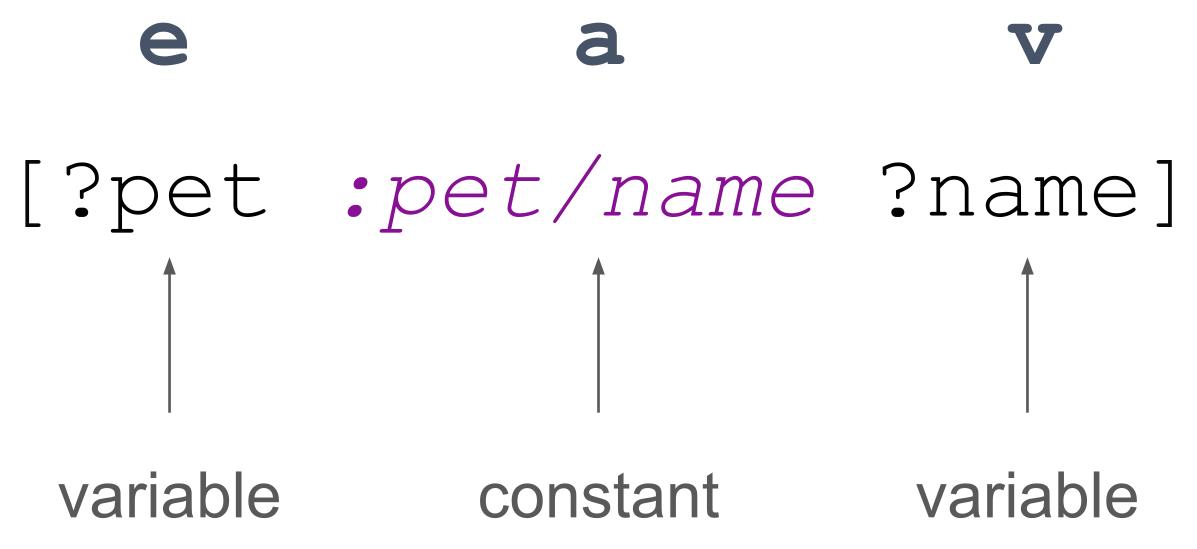

### Constantes limitam resultados, variáveis associam valores

Uma lista de todos os `id`s e nomes dos pets?

```clojure
[?pet :pet/name ?nome]
```

<img width="40%" src=attachment:90cbbae5-5c44-4962-af77-2e4e0cad266c.png>

[Documentação](https://docs.datomic.com/query/query-data-reference.html)

### Constantes podem aparecer em qualquer posição!

O nome do pet com `id` 300?

```clojure
[300 :pet/name ?nome]
```

<img width="40%" src=attachment:389205f7-ce62-401e-91d7-72b16edbcf75.png>

### E variáveis também!

Todos os atributos e valores do pet com `id` 300?

```clojure
[300 ?atributo ?valor]
```

<img width="40%" src=attachment:5a3674c3-48fc-401d-ab95-f94914650e35.png>

### `Join`s são **implícitos**

Quais são os pets da Hanna?

```clojure
[?dono :owner/name "Hanna"]
[?dono :owner/pets ?pets]
```

<img width="40%" src=attachment:9aa11d66-4a30-4877-b25c-4b24091a4996.png>

[Documentação](https://docs.datomic.com/query/query-executing.html#clause-order)

### A ordem não importa

Quais são todos os pets da Hanna?

```clojure
[?dono :owner/pets ?pets]
[?dono :owner/name "Hanna"]
```

<img width="40%" src=attachment:b2c7cb02-6043-41d5-8799-e1d4f7c590f2.png>

Mesmo resultado anterior!
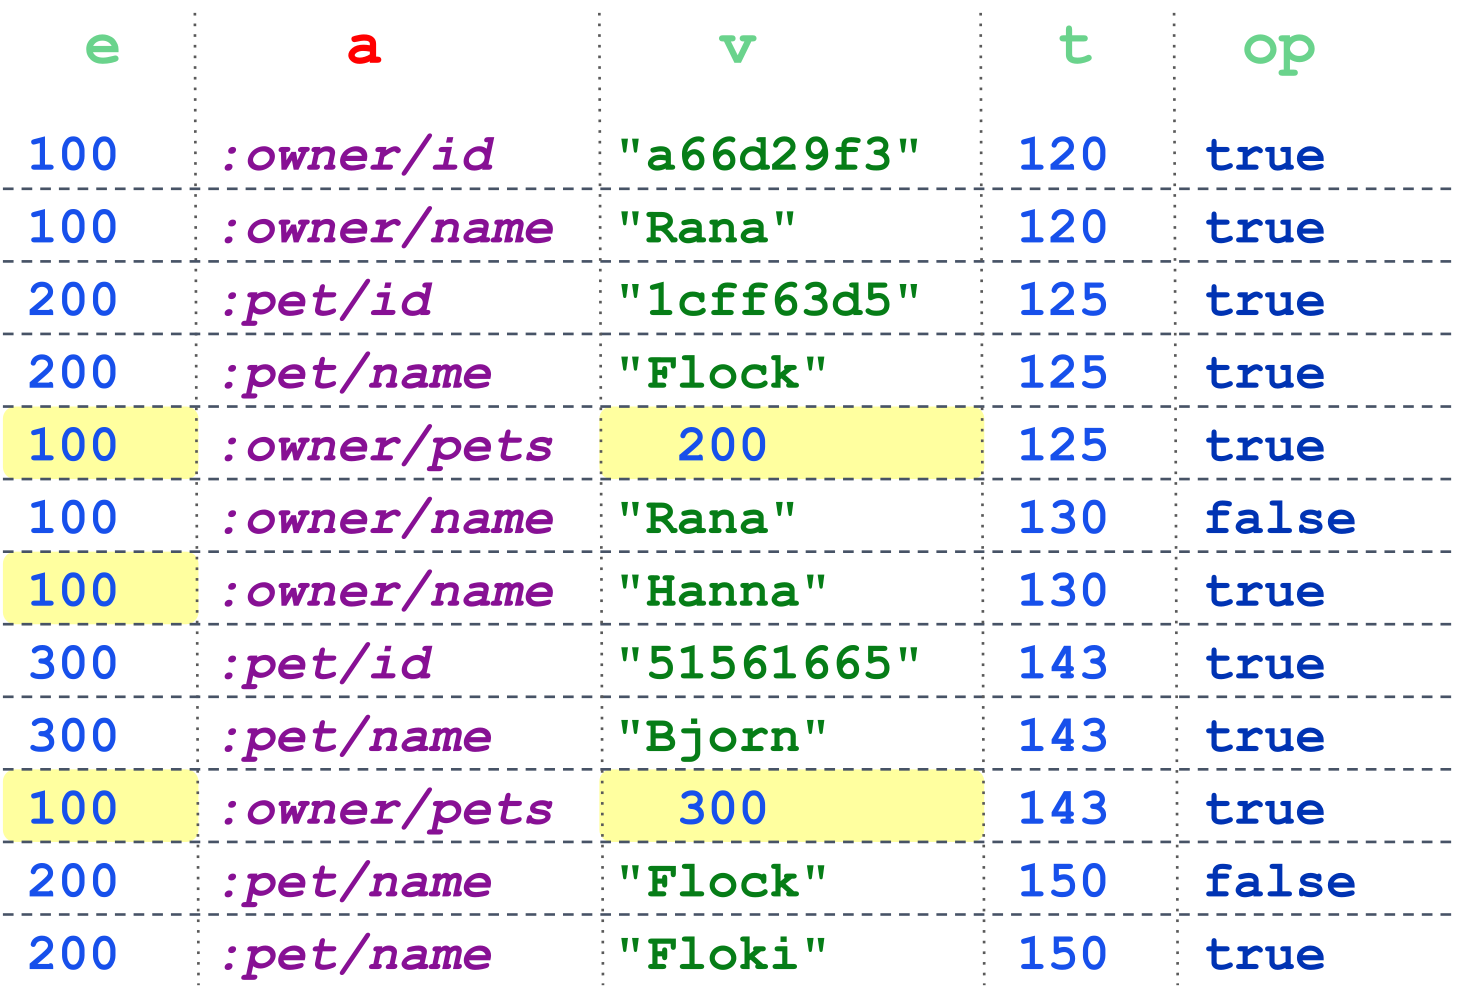

### Estrutura de uma consulta

No geral, uma consulta é formada por:
* `:find`: O que será retornado pela consulta;
* `:where`: Onde encontrar o dado que será retornado pela consulta.

Dentre outras cláusulas como `:in` (de *input*), `:with` e `:keys` ou `:strs` ou `:syms`

[Documentação](https://docs.datomic.com/query/query-data-reference.html#query-grammar)

In [ ]:
(def db (d/db conn))

(d/q '[:find  ?owner-name
       :where
       [?cat   :pet/name   "Floki"]
       [?owner :owner/pets ?cat]
       [?owner :owner/name ?owner-name]]
     db)

Perceba que acima o estado do banco de dados é passado como valor `db`. 

Diferentes `snapshots` de diferentes instantes podem ser criados para consultas, por exemplo: 

In [ ]:
(def db-as-of-date (d/as-of db #inst "2024-10-01"))
db-as-of-date

In [ ]:
(d/q '[:find  ?owner-name
       :where
       [?cat   :pet/name   "Floki"]
       [?owner :owner/pets ?cat]
       [?owner :owner/name ?owner-name]]
     db-as-of-date)

Todos esses valores são imutáveis! Isso garante que a mesma consulta para o mesmo estado de um banco de dados sempre retorna o mesmo resultado!

### Definindo mais paramêtros

Podemos utilizar a cláusula `:in` para definir mais paramêtros além de um estado do banco de dado.

[Documentação](https://docs.datomic.com/query/query-data-reference.html#inputs)

In [ ]:
(d/q '[:find ?owner-name
       :in $database ?cat-name
       :where [$database ?cat :pet/name ?cat-name]
              [$database ?owner :owner/pets ?cat]
              [$database ?owner :owner/name ?owner-name]]
     db       ; $database 
     "Floki") ; ?cat-name

Um estado do banco de dados é sempre um paramêtro obrigatório e, por conta disso, criou-se a convenção de nomea-lo somente de `$`, quando se faz outro nome ele deve iniciar com `$` como `$database`!

In [ ]:
(d/q '[:find ?owner-name
       :in $ ?cat-name
       :where [?cat :pet/name ?cat-name]
              [?owner :owner/pets ?cat]
              [?owner :owner/name ?owner-name]]
     db "Floki")

Muito mais simples a forma acima.

### Predicados

Podemos utilizar qualquer função do Clojure como predicado para filtrar nossa consulta.

[Documentação](https://docs.datomic.com/query/query-data-reference.html#predicate-example)

In [ ]:
(d/q '[:find ?cat
       :where [?cat :pet/name ?cat-name]
              [(clojure.string/starts-with? ?cat-name "F")]]
     db)

Mas é mais performático utilizar os predicados [embutidos](https://docs.datomic.com/query/query-data-reference.html#range-predicates)

In [ ]:
(d/q '[:find ?cat
       :where [?cat :pet/name ?cat-name]
              [(>= ?cat-name "F")]
              [(< ?cat-name "G")]]
     db)

### Pull

`Pull` é uma forma declarativa de percorrer grafos utilizando as estruturas de dados primitivas do clojure: vetores `[]` e mapas `{}`:

* Vetores acessam os valores do atributos;
* Mapas desconstroem referências.

Utilizar mapas é como aplicar `pull` em uma referência recursivamente!

[Documentação](https://docs.datomic.com/query/query-pull.html)

In [ ]:
(d/pull db [:owner/name
            {:owner/pets [:pet/name]}]
        [:owner/id owner-id])

`Pull` também permite "busca inversa" utilizando `_`.

Por exemplo:

In [ ]:
(d/pull db 
     [:pet/name 
     {:owner/_pets [:owner/name]}]            
      [:pet/id bjorn-id])

`:owner/_pets` retorna todos os **donos** relacionados a um pet (bjorn nesse caso) ao contrário de `:owner/pets` que retorna todos os **pets** relacionados a um dono!

Por fim, podemos utilizar `pull` dentro de uma consulta `d/q` para estruturar o retorno da consulta:

In [ ]:
(-> (d/q '[:find  (pull ?c [:pet/name
                          {:owner/_pets [:owner/name]}])
           :where [?c :pet/name ?cat-name]
                  [(>= ?cat-name "F")]
                  [(< ?cat-name "G")]]
         db)
    pp/pprint)

### Exercícios
Nesses exercícios vamos dar foco ao modelo de tempo, realizando consultas em diferentes instantes no tempo!

Vamos iniciar definindo nosso banco de dados:

In [ ]:
(def db (d/db conn))

Certo! Vamos ver o estado do banco da dados atual, ou melhor, tudo que é `true` em `op?` na quíntupla `[e a v t op?]`.

In [ ]:
(d/q '[:find  (pull ?e [*])
       :where [?e :owner/id owner-id]]
     db)

Construa uma consulta que busca pela `transação` onde a entidade `owner-id` foi adicionada.

In [ ]:
(def as-of-tx (first (d/q '[:find [?tx]
                            :in $ ?owner-id
                            :where 
                            [?e :owner/id ?owner-id change-me]] ; [e a v t op?]
                          db owner-id)))

Lembra do `as-of` e `since`? Finalmente teremos a change de vê-los em prática!

Relembrando:
* `as-of`: vê até instante no tempo;
* `since`: vê a partir de um instante no tempo.

Uma busca no passado:

In [ ]:
(d/q '[:find (pull ?e [*])
       :in $ ?owner-id
       :where [?e :owner/id ?owner-id]]
     (d/as-of db as-of-tx)
     owner-id)

Uma busca a partir de `as-of-tx`:

In [ ]:
(d/q '[:find (pull ?e [* {:owner/pets [*]}])
       :in $ ?owner-id
       :where [?e :owner/id ?owner-id]]
     (d/since db as-of-tx) 
     owner-id)

Por que a busca acima retornou um vetor vazio?

Por fim, podemos utilizar `d/with` para simular uma transação.

Toda transação feita dentro de `d/with` não é persistida! 

Criando um universo paralelo:

In [ ]:
(def db-with-misha (d/with db [{:owner/id   owner-id
                                :owner/pets [{:db/id    "M"
                                              :pet/id   (d/squuid)
                                              :pet/name "Misha"
                                              :pet/type :pet.type/cat}]}]))

In [ ]:
(d/q '[:find (pull ?e [* {:owner/pets [*]}])
       :where [?e :owner/id owner-id]]
     (d/db conn))

Por que a busca anterior não retorna Misha?